# ESA CCI 1982

## Reclassify ESA CCI land cover classes

In [2]:
colormap = {
    -32768: (0, 0, 0),  # No data
    10: (255, 255, 110),  # Cropland, rainfed
    11: (255, 255, 110), # Herbaceous cover
    12: (255, 255, 110), # Tree or shrub cover
    20: (118, 241, 239),  # Cropland, irrigated or post-flooding
    30: (218,236,108),  # Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)
    40: (205,195,105),  # Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)
    50: (0,99,19),  # Tree cover, broadleaved, evergreen, closed to open (>15%)
    60: (0,99,19),  # Tree cover, broadleaved, deciduous, closed to open (>15%)
    61: (0,99,19),  # Tree cover, broadleaved, deciduous, closed (>40%)
    62: (0,99,19),  # Tree cover, broadleaved, deciduous, open (15-40%)
    70: (0,99,19),  # Tree cover, needleleaved, evergreen, closed to open (>15%)
    71: (0,99,19),  # Tree cover, needleleaved, evergreen, closed (>40%)
    72: (0,99,19),  # Tree cover, needleleaved, evergreen, open (15-40%)
    80: (0,99,19),  # Tree cover, needleleaved, deciduous, closed to open (>15%)
    81: (0,99,19),  # Tree cover, needleleaved, deciduous, closed (>40%)
    82: (0,99,19),  # Tree cover, needleleaved, deciduous, open (15-40%)
    90: (120,127,27),  # Tree cover, mixed leaf type (broadleaved and needleleaved)
    100: (120,127,27),  # Mosaic tree and shrub (>50%) / herbaceous cover (<50%)
    110: (208,144,34),  # Mosaic herbaceous cover (>50%) / tree and shrub (<50%)
    120: (168,96,25),  # Shrubland
    121: (168,96,25),  # Evergreen shrubland
    122: (168,96,25),  # Deciduous shrubland
    130: (255,172,66),  # Grassland
    140: (255,217,209),  # Lichens and mosses
    150: (255,231,176),  # Sparse vegetation (tree, shrub, herbaceous cover) (<15%)
    151: (255,231,176),  # Sparse tree (<15%)
    152: (255,231,176),  # Sparse shrub (<15%)
    153: (255,231,176),  # Sparse herbaceous cover (<15%)
    160: (0,120,91),  # Tree cover, flooded, fresh or brakish water
    170: (0,120,91),  # Tree cover, flooded, saline water
    180: (0,120,91),  # Shrub or herbaceous cover, flooded, fresh/saline/brakish water
    190: (230,0,23),  # Urban areas
    200: (220, 220, 220),  # Bare areas
    201: (220, 220, 220),  # Consolidated bare areas
    202: (220, 220, 220),  # Unconsolidated bare areas
    210: (0,83,196),  # Water bodies
    220: (255,255,255)  # Permanent snow and ice
}

class_names = {
    -32768:  "No data",
    10: "Cropland, rainfed",
    11: "Herbaceous cover",
    12: "Tree or shrub cover",
    20: "Cropland, irrigated or post-flooding",
    30: "Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)",
    40: "Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)",
    50: "Tree cover, broadleaved, evergreen, closed to open (>15%)",
    60: "Tree cover, broadleaved, deciduous, closed to open (>15%)",
    61: "Tree cover, broadleaved, deciduous, closed (>40%)",
    62: "Tree cover, broadleaved, deciduous, open (15-40%)",
    70: "Tree cover, needleleaved, evergreen, closed to open (>15%)",
    71: "Tree cover, needleleaved, evergreen, closed (>40%)",
    72: "Tree cover, needleleaved, evergreen, open (15-40%)",
    80: "Tree cover, needleleaved, deciduous, closed to open (>15%)",
    81: "Tree cover, needleleaved, deciduous, closed (>40%)",
    82: "Tree cover, needleleaved, deciduous, open (15-40%)",
    90: "Tree cover, mixed leaf type (broadleaved and needleleaved)",
    100: "Mosaic tree and shrub (>50%) / herbaceous cover (<50%)",
    110: "Mosaic herbaceous cover (>50%) / tree and shrub (<50%)",
    120: "Shrubland",
    121: "Evergreen shrubland",
    122: "Deciduous shrubland",
    130: "Grassland",
    140: "Lichens and mosses",
    150: "Sparse vegetation (tree, shrub, herbaceous cover) (<15%)",
    151: "Sparse tree (<15%)",
    152: "Sparse shrub (<15%)",
    153: "Sparse herbaceous cover (<15%)",
    160: "Tree cover, flooded, fresh or brackish water",
    170: "Tree cover, flooded, saline water",
    180: "Shrub or herbaceous cover, flooded, fresh/saline/brackish water",
    190: "Urban areas",
    200: "Bare areas",
    201: "Consolidated bare areas",
    202: "Unconsolidated bare areas",
    210: "Water bodies",
    220: "Permanent snow and ice"
}
# Define new classifications
new_classes = {
    1: "Agriculture",
    2: "Bare Soil",
    3: "Herbaceous and Shrubland Vegetation",
    4: "Native Forest",
    7: "Urban Area",
    8: "Water"
}

# Define old to new classification mapping
old_to_new_mapping = {
    10: 1,  # Cropland, rainfed
    20: 1,  # Cropland, irrigated or post-flooding
    30: 1,  # Mosaic cropland (>50%) / natural vegetation (tree, shrub, herbaceous cover) (<50%)
    40: 1,  # Mosaic natural vegetation (tree, shrub, herbaceous cover) (>50%) / cropland (<50%)
    200: 2,  # Bare areas
    201: 2,  # Consolidated bare areas
    202: 2,  # Unconsolidated bare areas
    11: 3,  # Herbaceous cover
    12: 3,  # Tree or shrub cover
    100: 3,  # Mosaic tree and shrub (>50%) / herbaceous cover (<50%)
    110: 3,  # Mosaic herbaceous cover (>50%) / tree and shrub (<50%)
    120: 3,  # Shrubland
    121: 3,  # Evergreen shrubland
    122: 3,  # Deciduous shrubland
    130: 1,  # Grassland
    140: 3,  # Lichens and mosses
    150: 3,  # Sparse vegetation (tree, shrub, herbaceous cover) (<15%)
    151: 3,  # Sparse tree (<15%)
    152: 3,  # Sparse shrub (<15%)
    153: 3,  # Sparse herbaceous cover (<15%)
    180: 3,  # Shrub or herbaceous cover, flooded, fresh/saline/brakish water
    50: 4,  # Tree cover, broadleaved, evergreen, closed to open (>15%)
    60: 4,  # Tree cover, broadleaved, deciduous, closed to open (>15%)
    61: 4,  # Tree cover, broadleaved, deciduous, closed (>40%)
    62: 4,  # Tree cover, broadleaved, deciduous, open (15-40%)
    70: 4,  # Tree cover, needleleaved, evergreen, closed to open (>15%)
    71: 4,  # Tree cover, needleleaved, evergreen, closed (>40%)
    72: 4,  # Tree cover, needleleaved, evergreen, open (15-40%)
    80: 4,  # Tree cover, needleleaved, deciduous, closed to open (>15%)
    81: 4,  # Tree cover, needleleaved, deciduous, closed (>40%)
    82: 4,  # Tree cover, needleleaved, deciduous, open (15-40%)
    90: 4,  # Tree cover, mixed leaf type (broadleaved and needleleaved)
    160: 4,  # Tree cover, flooded, fresh or brakish water
    170: 4,  # Tree cover, flooded, saline water
    190: 7,  # Urban areas
    210: 8,  # Water bodies
    220: 8  # Permanent snow and ice
}

# Define the colormap for the new classification
new_colormap = {
    1: (255, 255, 110),  # Agriculture
    2: (220, 220, 220),  # Bare Soil
    3: (205,195,105),  # Herbaceous and Shrubland Vegetation
    4: (0,99,19),  # Native Forest
    7: (230,0,23),  # Urban Area
    8: (0,83,196),  # Water
    -1: (0, 0, 0)  # No data
}

# Class names for the legend
new_class_names = {
    -1: "No data",
    1: "Agriculture",
    2: "Bare Soil",
    3: "Herbaceous and Shrubland Vegetation",
    4: "Native Forest",
    7: "Urban Area",
    8: "Water"
}


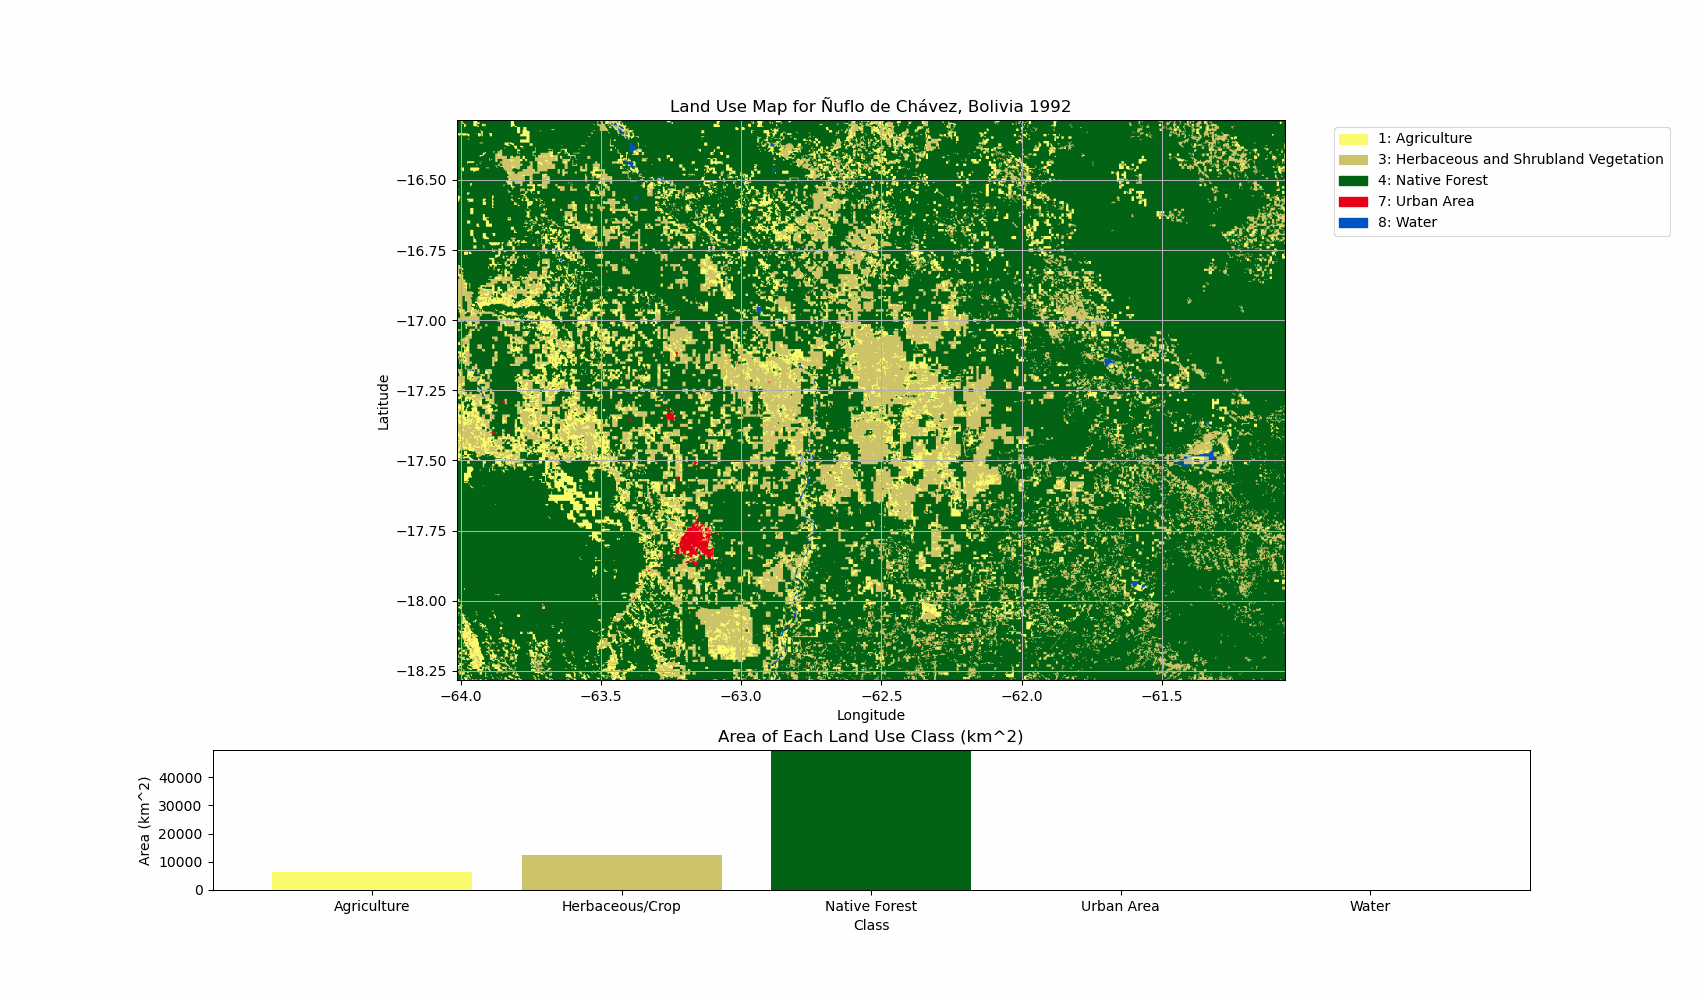

In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import rasterio
from rasterio.windows import from_bounds
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

x_min, x_max = -64.01300048828148, -61.05987548828149
y_min, y_max = -18.28252064098009, -16.286426890980096

filepaths = [(f"C:/Users/carsk/Downloads/website/Land cover analysis/ESA CCI/esa{year}.tif") for year in range(1992, 2021)]

# Define class names
class_names = {1: "Agriculture", 3: "Herbaceous/Crop", 4: "Native Forest", 7: "Urban Area", 8: "Water"}

def apply_colormap(image, colormap):
    colored_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    for cls, color in colormap.items():
        colored_image[image == cls] = color
    return colored_image

# Initialize maximum area
max_area = 0
areas = []

# Compute areas and find maximum area
for filepath in filepaths:
    with rasterio.open(filepath) as src:
        window = from_bounds(x_min, y_min, x_max, y_max, src.transform)
        image = src.read(window=window)
        if image.shape[0] == 1:
            image = image[0]
        new_image = np.full_like(image, -1)
        for old_class, new_class in old_to_new_mapping.items():
            new_image[image == old_class] = new_class

        # from pixel to area
        unique, counts = np.unique(new_image, return_counts=True)
        mask = np.isin(unique, list(class_names.keys()))
        unique, counts = unique[mask], counts[mask]
        area = counts * 0.09
        max_area = max(max_area, np.max(area))
        areas.append((unique, area))

## plots generation 
frames = []
for filepath, (unique, area) in zip(filepaths, areas):
    with rasterio.open(filepath) as src:
        window = from_bounds(x_min, y_min, x_max, y_max, src.transform)
        image = src.read(window=window)

        if image.shape[0] == 1:
            image = image[0]
            
        new_image = np.full_like(image, -1)
        for old_class, new_class in old_to_new_mapping.items():
            new_image[image == old_class] = new_class

        colored_new_image = apply_colormap(new_image, new_colormap)

        legend_patches = [mpatches.Patch(color=np.array(new_colormap[cls])/255, label=f"{cls}: {new_class_names[cls]}") for cls in new_colormap if cls in class_names]

        fig = plt.figure(figsize=(17, 10))
        gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1])  # 2:1 height ratio

        ax0 = plt.subplot(gs[0])
        ax0.imshow(colored_new_image, extent=[x_min, x_max, y_min, y_max]) 
        ax0.set_title('Land Use Map for Ñuflo de Chávez, Bolivia ' + filepath[-8:-4])
        ax0.set_xlabel('Longitude')
        ax0.set_ylabel('Latitude')
        ax0.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left')
        ax0.grid(True)  
        
        ax1 = plt.subplot(gs[1])
        labels = [class_names[cls] for cls in unique]
        ax1.bar(labels, area, color=[np.array(new_colormap[cls])/255 for cls in unique])
        ax1.set_title('Area of Each Land Use Class (km^2)')
        ax1.set_xlabel('Class')
        ax1.set_ylabel('Area (km^2)')
        ax1.set_ylim([0, max_area]) 
        
       
        png_path = filepath[:-4] + '.png'
        plt.savefig(png_path)
        plt.close()
        
        
        frames.append(Image.open(png_path))


gif_path = os.path.expanduser("C:/Users/carsk/Downloads/website/Land cover analysis/land_use_change.gif")
frames[0].save(gif_path, format='GIF', append_images=frames[1:], save_all=True, duration=200, loop=0)


for filepath in filepaths:
    png_path = filepath[:-4] + '.png'
    if os.path.exists(png_path):
        os.remove(png_path)

from IPython.display import Image


gif_path = os.path.expanduser("C:/Users/carsk/Downloads/website/Land cover analysis/land_use_change.gif")


Image(filename=gif_path)
